## PREREQUISITES

#### Import Libraries

In [659]:
import os
import sys

import pandas as pd
import numpy as np
import re

#### Import Modules

In [660]:
%load_ext autoreload
%autoreload 2

# Build an absolute path from this notebook's parent directory
package_path = os.path.abspath(os.path.join('../src'))

# # Add to sys.path if not already present
if package_path not in sys.path: 
    sys.path.insert(0, package_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [661]:
from config import DATA_DIR 
from dataingestion import DataIngestion
from logger import logging

#### Data Ingestion

In [662]:
data_in = DataIngestion()
df, raw_data_path = data_in.initiate_data_ingestion()

In [663]:
# Testing: - read file

df = pd.read_csv('../data/raw/amazon_2023/Dummy_reviews.csv', index_col=False, dtype='object')
# df = pd.read_csv('../data/raw/amazon_2023/dummy_exploded.csv', dtype='object', index_col=False)

In [664]:
df.head()

,product_id,product_name,category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,D001,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,₹399,"₹1,099",64%,4.2,"24,269","Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,D002,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,type c usb,₹199,₹349,43%,4,"43,994","For Smartphones, Tablets, Laptops & other Typ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,D003,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,₹199,"₹1,899",90%,3.9,"7,928","Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,D004,boAt Deuce USB 300 2 in 1 Type-C & Micro USB,Computers&Accessories|Accessories&Peripherals|...,"type c usb, micro usb",₹329,₹699,53%,4.2,"94,363","Stress Resistant, Tangle-Free, Sturdy Cable wi...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,D005,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,₹154,₹399,61%,4.2,"16,905","With Charge & Sync Function for iPhone, iPad (...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           27 non-null     object
 1   product_name         27 non-null     object
 2   category             27 non-null     object
 3   subcategory          27 non-null     object
 4   discounted_price     27 non-null     object
 5   actual_price         27 non-null     object
 6   discount_percentage  27 non-null     object
 7   rating               27 non-null     object
 8   rating_count         27 non-null     object
 9   about_product        27 non-null     object
 10  user_id              27 non-null     object
 11  user_name            27 non-null     object
 12  review_id            27 non-null     object
 13  review_title         27 non-null     object
 14  review_content       27 non-null     object
 15  img_link             27 non-null     object
 16  product_li

## DATA CLEANING

In [666]:
logging.info(f'Dataset shape before cleaning step: {df.shape}')
df.shape

(27, 17)

In [667]:
# Check columns' data types and count 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           27 non-null     object
 1   product_name         27 non-null     object
 2   category             27 non-null     object
 3   subcategory          27 non-null     object
 4   discounted_price     27 non-null     object
 5   actual_price         27 non-null     object
 6   discount_percentage  27 non-null     object
 7   rating               27 non-null     object
 8   rating_count         27 non-null     object
 9   about_product        27 non-null     object
 10  user_id              27 non-null     object
 11  user_name            27 non-null     object
 12  review_id            27 non-null     object
 13  review_title         27 non-null     object
 14  review_content       27 non-null     object
 15  img_link             27 non-null     object
 16  product_li

In [668]:
# Check null columns

df.isna().sum()

product_id             0
product_name           0
category               0
subcategory            0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [669]:
# Drop empty rows

df.dropna(how='any', inplace=True)
df.shape

(27, 17)

In [670]:
# Drop duplicates

df = df.drop_duplicates(subset=['product_id'])
df.shape

(27, 17)

In [671]:
# Checkpoint: Ensure no more duplicates

assert df.product_id.duplicated().sum()== 0 , "Duplicate product_ids still present"

In [672]:
# Transform the numeric columns

numeric_columns = [ 'discounted_price',  'actual_price', 'discount_percentage', 'rating' ,'rating_count']

for col in numeric_columns:
    df[col] = df[col].str.translate(str.maketrans({'₹': None, ',': None, '%': None, '/': None, '|': None}))

    # Coerce and put NaN for plain char/string entries
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
    # df[col].dropna(how='any', axis=0, inplace=True)

    df[col] = df[col].astype('float')

df.head()

,product_id,product_name,category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,D001,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,399.0,1099.0,64.0,4.2,24269.0,"Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,D002,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,type c usb,199.0,349.0,43.0,4.0,43994.0,"For Smartphones, Tablets, Laptops & other Typ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,D003,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,199.0,1899.0,90.0,3.9,7928.0,"Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,D004,boAt Deuce USB 300 2 in 1 Type-C & Micro USB,Computers&Accessories|Accessories&Peripherals|...,"type c usb, micro usb",329.0,699.0,53.0,4.2,94363.0,"Stress Resistant, Tangle-Free, Sturdy Cable wi...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,D005,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,154.0,399.0,61.0,4.2,16905.0,"With Charge & Sync Function for iPhone, iPad (...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [673]:
# Verify the transformation result for  numeric columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           27 non-null     object 
 1   product_name         27 non-null     object 
 2   category             27 non-null     object 
 3   subcategory          27 non-null     object 
 4   discounted_price     27 non-null     float64
 5   actual_price         27 non-null     float64
 6   discount_percentage  27 non-null     float64
 7   rating               27 non-null     float64
 8   rating_count         27 non-null     float64
 9   about_product        27 non-null     object 
 10  user_id              27 non-null     object 
 11  user_name            27 non-null     object 
 12  review_id            27 non-null     object 
 13  review_title         27 non-null     object 
 14  review_content       27 non-null     object 
 15  img_link             27 non-null     objec

In [674]:
# [Checkpoint]: Assert numeric columns' dtypes should be numeric, specifically float32

import numbers

for col in numeric_columns:
    # assert str(df[col].dtype) == 'float32', f'Column {col} conversion to float32 failed!'
    assert issubclass(df[col].dtype.type, numbers.Number), f'Column {col} conversion to float32 failed!'

In [675]:
# Check for null columns 

df.isna().sum()

product_id             0
product_name           0
category               0
subcategory            0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [676]:
# Drop empty rows

df.dropna(how='any', axis=0, inplace=True)
df.shape

(27, 17)

In [677]:
# [Checkpoint] : Ensure no more null columns

assert ((df.isna().sum().unique()[0] == 0) & (len(df.isna().sum().unique()) == 1)), 'Null values exists! Check dataframe.'

## EDA

In [678]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Summary Statistics

In [679]:
# Statistics for numeric columns using describe()

df.select_dtypes(exclude='object').describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,943.755556,1625.222222,49.592593,4.011111,38614.222222
std,1019.393785,1260.239212,21.275228,0.345669,87492.855475
min,149.000000,299.000000,0.000000,3.100000,2.000000
25%,199.000000,699.500000,31.000000,3.900000,820.000000
50%,399.000000,1000.000000,55.000000,4.100000,6987.000000
75%,1531.000000,2497.000000,62.000000,4.200000,27641.000000
max,3487.770000,4990.000000,90.000000,4.400000,426973.000000


#### Pairwise relationship

<Figure size 1000x1000 with 0 Axes>

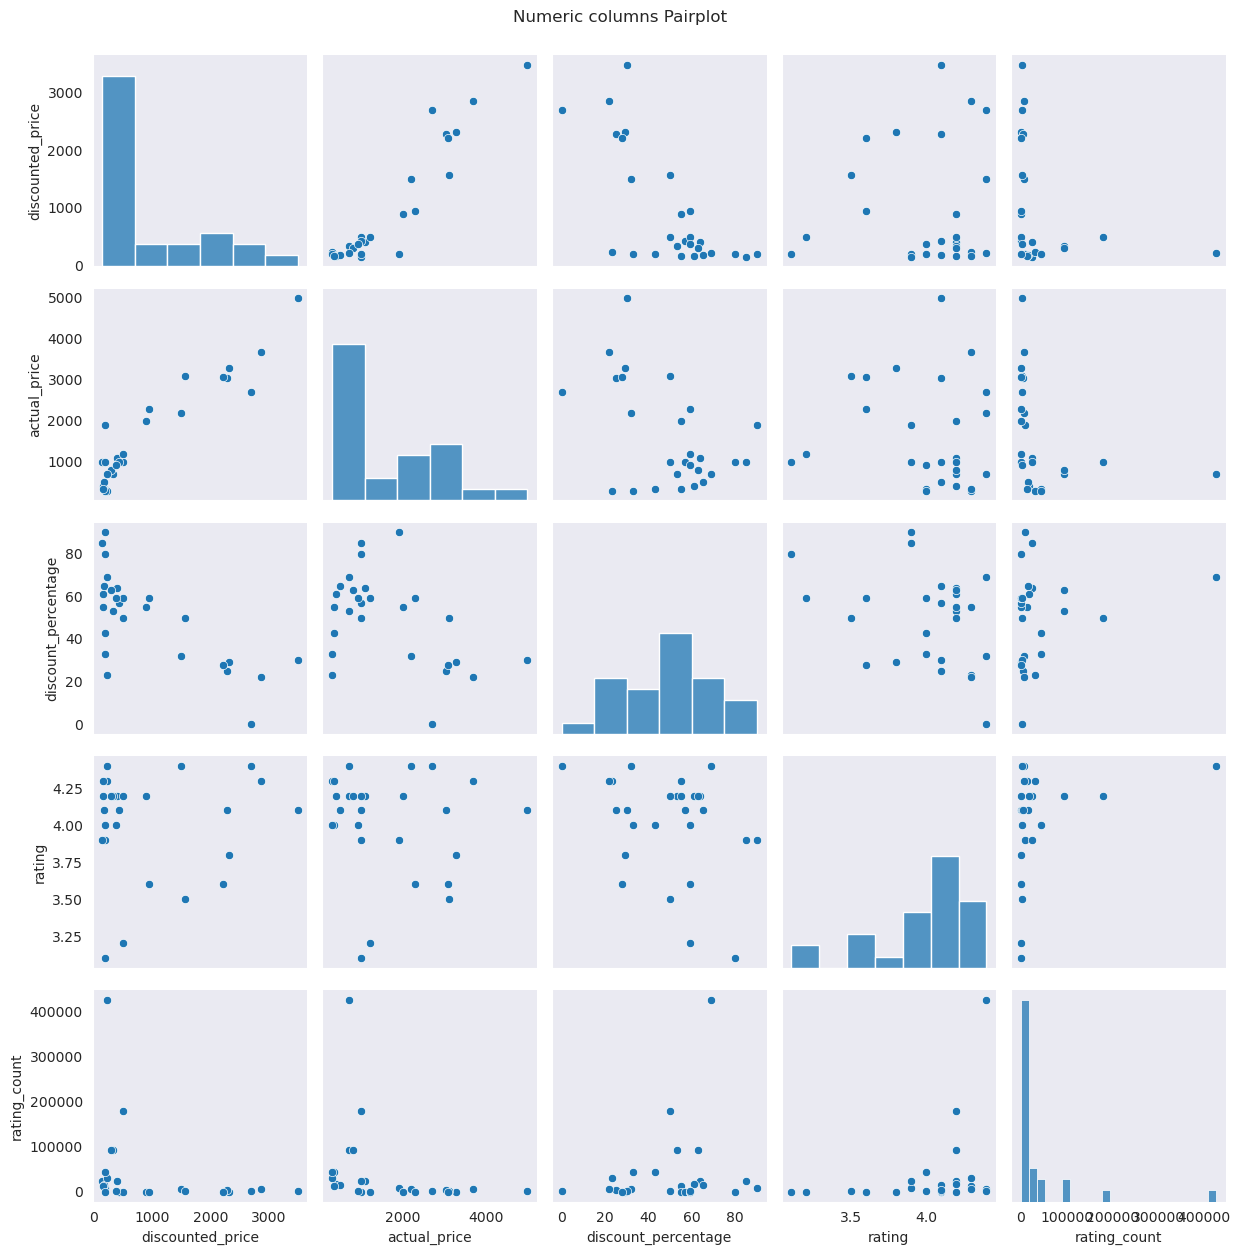

In [680]:
# Create a pairplot for all numeric columns

sns.set_style('dark', {'axes.grid':False})
plt.figure(figsize=(10,10))
sns.pairplot(df[numeric_columns]).fig.suptitle('Numeric columns Pairplot', y=1.0)
plt.tight_layout()
plt.show()

#### Outlier Detection

In [681]:
# UDF for plotting columns using a boxplot

def show_boxplot(data:pd.DataFrame, col:str, title:str) -> None:
    plt.figure(figsize=(5,3))
    box_rating = sns.boxplot(data=data, x=col)
    box_rating.set_title(title)
    # plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

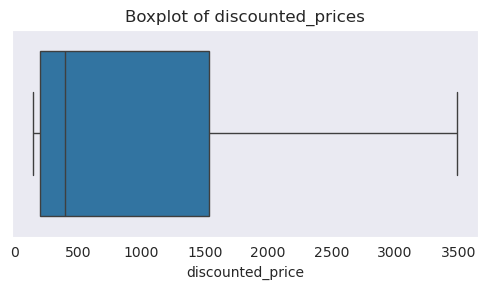

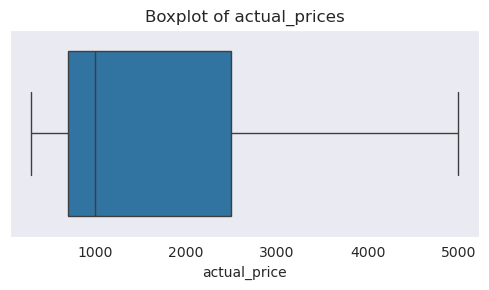

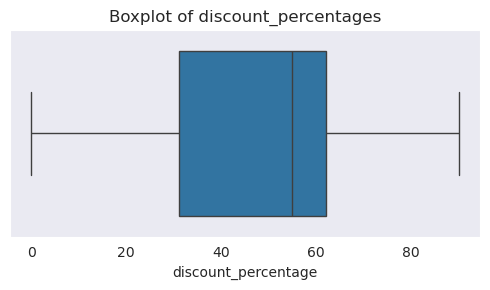

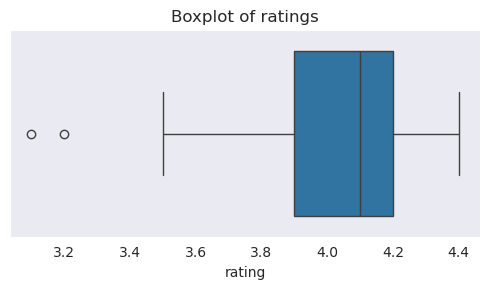

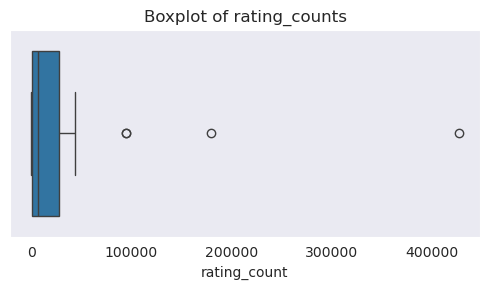

In [682]:
# Check for outliers

for col in numeric_columns:

    title = f'Boxplot of {col}s'
    show_boxplot(df, col, title)

In [683]:
# UDF: Function for extracting outliers and non-outliers from a dataframe

def process_outliers(data_df: pd.DataFrame, col: str, is_outlier = True) -> pd.DataFrame:
    '''Desc: Custom function for extracting outliers or non-outliers depending on the is_outlier argument.
    
    Input: 
        data_df: pd.DataFrame - dataframe to process
        col: str - column to process
        is_outlier: bool - If True (by default) will extract outliers; otherwise, non-outliers'''
    
    q1 = data_df[col].quantile(0.25)
    q3 = data_df[col].quantile(0.75)
    iqr = q3 - q1
    if is_outlier:
        result = data_df[((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
    else:
        result = data_df[~((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
        
    return result

In [684]:
# Highly rated items that are outliers

df_ol = process_outliers(df, 'actual_price', is_outlier=True)
df_ol.sort_values('actual_price', ascending=False)

,product_id,product_name,category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [685]:
df_ol.category.value_counts()

Series([], Name: count, dtype: int64)

#### Correlations

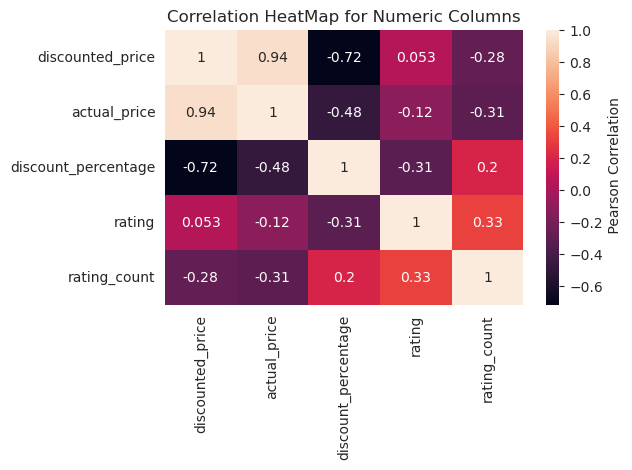

In [686]:
# Correlation Matrix

correlation_matrix = df[numeric_columns].corr()
heatmap = sns.heatmap(correlation_matrix,  annot=True, cbar_kws={'label':' Pearson Correlation'})
heatmap.set_title('Correlation HeatMap for Numeric Columns')
plt.tight_layout()
plt.show()

> There is very little correlation between the ratings and actual/discounted price.

In [687]:
df.shape

(27, 17)

###  Solution to Cold-Start Problem:

#### 1. Recommending Top Categories

In [688]:
from inspect import signature
from collections import Counter

In [689]:
df.category.value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        11
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|ElectricHeaters                                       2
Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters                               1
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|WaffleMakers&Irons                             1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandMixers                                     1
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders                                   1
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters                                            1
Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines                  1
Home&Kitchen|Kitche

In [690]:
# UDF: count texts in a list

def count_list(col: pd.Series) -> Counter:
    '''Desc:
        Uses collections.Counter function to count elements in a list.
        If using a column, make sure to pass a LIST of strings.
    Input: Pandas.Series object
    Return: collections.Counter object'''
    
    return Counter( e for entries in col for e in entries)

In [691]:
# Count and extract all categories

df['categories'] = df['category'].apply(lambda x: x.split('|')) 
# l_categories = df['category'].apply(lambda x: x.split(' ')) 

categories = count_list(l_categories)
type(categories)
print(f'There are {len(categories)} in categories')
categories.most_common(10)

There are 35 in categories


[('Home&Kitchen', 103),
 ('Computers&Accessories', 96),
 ('Cables', 96),
 ('Accessories&Peripherals', 88),
 ('Cables&Accessories', 88),
 ('USBCables', 88),
 ('Kitchen&HomeAppliances', 71),
 ('SmallKitchenAppliances', 54),
 ('Heating,Cooling&AirQuality', 32),
 ('RoomHeaters', 32)]

In [692]:
# Save categories count to a dataframe

df_categories = pd.DataFrame( {'category':  [c[0] for c in categories.items()], 'count': [c[1] for c in categories.items()]} )
df_categories = df_categories.sort_values('count', ascending=False)

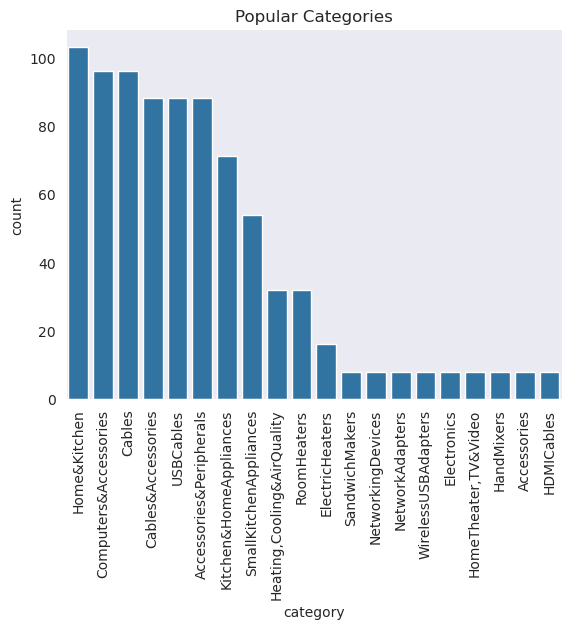

In [693]:
# Plot results

bar_categories = sns.barplot(data=df_categories.sort_values('count', ascending=False).head(20), x='category', y='count')
bar_categories.set_title('Popular Categories')
plt.xticks(rotation=90)
plt.show()

#### 2. Recommending Top-Rated Products per (chosen) category

In [694]:
# UDF: Custom function to filter dataframe by selected category

def filter_by_category(df_data: pd.DataFrame, category: str) -> pd.DataFrame:
    '''Desc:
        Drill down dataframe by the desired category.
    Input: df_data: pd.DataFrame
    Return: df_filtered: pd.DataFrame'''


    df_filtered = df_data[df_data['category'].str.contains(category)]
    return df_filtered

In [695]:
# Input Block: Select desired category using the rank (index from prev. step).

# rank = input('Select rank:')

# Dummy Test: Use #18 for earbuds/headphones category. 
rank = 4

# Retrieve and display the category based on rank

selected_category = df_categories.iloc[int(rank),:].category
print(f'Selected Category: {selected_category}')

Selected Category: USBCables


In [696]:
# Execute filter_by_category function

df_filtered_category = filter_by_category(df, selected_category)

In [697]:
# Testing :Check if Counter object returns the same number of results from the selected category]

test_l_filtered = df_filtered_category['category'].apply(lambda x: x.split('|'))
test_cats = count_list(test_l_filtered)

In [698]:
# Checkpoint: Number of entries in counter result must equal the number of rows in filtered dataframe 

assert test_cats.get(selected_category) == df_filtered_category.shape[0], "Results are not equal!"

In [699]:
df_filtered_category.head(2)

,product_id,product_name,category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,categories
0,D001,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,lightning usb,399.0,1099.0,64.0,4.2,24269.0,"Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[Computers&Accessories, Accessories&Peripheral..."
1,D002,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,type c usb,199.0,349.0,43.0,4.0,43994.0,"For Smartphones, Tablets, Laptops & other Typ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[Computers&Accessories, Accessories&Peripheral..."


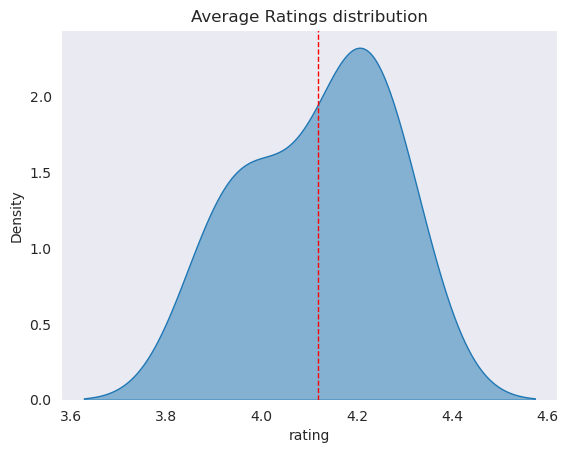

In [700]:
# Plot mean rating distribution

sns.kdeplot(data=df_filtered_category, x='rating', fill=True, alpha=0.5)
plt.title('Average Ratings distribution')
plt.axvline(x=df_filtered_category['rating'].mean(), ls='--', linewidth=1, color='red')
plt.show()

In [701]:
# Input Block: Specify the number of Top Results to display

# n_result = input('Enter number of results to display')

# Dummy Test: Use 10
n_result = 5
print(f'Chosen no. of results to display: {n_result}')

Chosen no. of results to display: 5


<div class="alert alert-block alert-info">
The Bayesian Average of the ratings would be a more reliable criteria; however, the rating column already corresponds to the mean or aggregated ratings from from multiple raters/reviewers. As this is the case, the columns, rating and rating count can be used to determine the top rated items per the chosen category. 
</div>

In [702]:
# Show results: Top products from the chosen category

df_toprated = df_filtered_category.sort_values(by=['rating', 'rating_count'], ascending=[False,False])
df_toprated[['product_id', 'product_name', 'rating', 'rating_count', 'category']].head(int(n_result))

,product_id,product_name,rating,rating_count,category
7,D008,MI Usb Type-C Cable Smartphone (Black),4.3,30411.0,Computers&Accessories|Accessories&Peripherals|...
10,D011,Portronics Konnect L POR-1081 Fast Charging 3A...,4.3,13391.0,Computers&Accessories|Accessories&Peripherals|...
3,D004,boAt Deuce USB 300 2 in 1 Type-C & Micro USB,4.2,94363.0,Computers&Accessories|Accessories&Peripherals|...
11,D012,boAt Rugged v3 micro usb,4.2,94363.0,Computers&Accessories|Accessories&Peripherals|...
0,D001,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269.0,Computers&Accessories|Accessories&Peripherals|...


## PRE-PROCESSING

In [471]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Content-Based Filtering: Find Similar Products

In [703]:
# Split the words in categories column by replacing '|' with ' '

df.category = df.category.str.replace('|', ' ')
df.category.value_counts()

category
Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables                        11
Home&Kitchen Heating,Cooling&AirQuality RoomHeaters ElectricHeaters                                       2
Computers&Accessories NetworkingDevices NetworkAdapters WirelessUSBAdapters                               1
Electronics HomeTheater,TV&Video Accessories Cables HDMICables                                            1
Home&Kitchen Kitchen&HomeAppliances SmallKitchenAppliances WaffleMakers&Irons                             1
Home&Kitchen Kitchen&HomeAppliances SmallKitchenAppliances HandMixers                                     1
Home&Kitchen Kitchen&HomeAppliances SmallKitchenAppliances HandBlenders                                   1
Home&Kitchen Heating,Cooling&AirQuality RoomHeaters FanHeaters                                            1
Home&Kitchen Kitchen&HomeAppliances SewingMachines&Accessories Sewing&EmbroideryMachines                  1
Home&Kitchen Kitche

In [704]:
# New column: feature_group = product_id, product_name, category, (TBD: about_product)

selected_features = ['product_id', 'product_name', 'category']

df['feature_group'] = df[selected_features].agg(' '.join, axis=1)
df.head(2)

,product_id,product_name,category,subcategory,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,categories,feature_group
0,D001,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,lightning usb,399.0,1099.0,64.0,4.2,24269.0,"Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[Computers&Accessories, Accessories&Peripheral...",D001 Wayona Nylon Braided USB to Lightning Fas...
1,D002,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories Accessories&Peripherals ...,type c usb,199.0,349.0,43.0,4.0,43994.0,"For Smartphones, Tablets, Laptops & other Typ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[Computers&Accessories, Accessories&Peripheral...",D002 Ambrane Unbreakable 60W / 3A Fast Chargin...


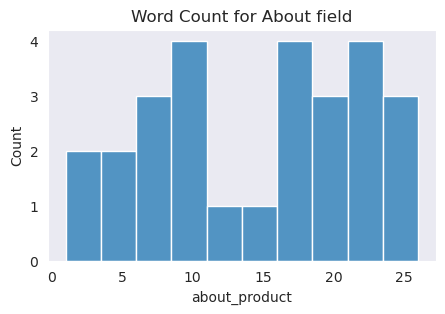

In [705]:
# Distribution of word count for About column

about_word_count = df.about_product.str.split().str.len()

sns.set_style('dark')
plt.figure(figsize=(5,3))
about_count = sns.histplot(x=about_word_count, bins=10)
about_count.set_title('Word Count for About field')
plt.show()

#### Stemming and Tokenization

In [706]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/edu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/edu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [707]:
# Testing purposes - flag token
flag_token = False

In [708]:
# Stemming and Tokenization instances

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [709]:
# UDF: Custom function for tokenization of texts

def tokenizer(txt):

    global flag_token
    word_tokens = nltk.word_tokenize(txt)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_text = [stemmer.stem(text) for text in filtered_sentence]
    flag_token = True
    return ' '.join(filtered_text)

In [710]:
# Apply custom tokenizer to feature_group column

df['feature_group'] = df['feature_group'].apply(lambda x: tokenizer(x))

In [711]:
#deletable - preview tokenized feature_group
df['feature_group'].values

array(['d001 wayona nylon braid usb lightn fast charg data sync cabl comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd002 ambran unbreak 60w / 3a fast charg 1.5m braid type c cabl comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd003 sounc fast phone charg cabl & data sync usb cabl comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd004 boat deuc usb 300 2 1 type-c & micro usb comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd005 portron konnect l 1.2m fast charg 3a 8 pin usb cabl comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd006 ptron solero tb301 3a type-c data fast charg cabl comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd007 boat micro usb 55 comput & accessori accessori & peripher cabl & accessori cabl usbcabl',
       'd008 mi usb type-c cabl smartphon ( black ) comput & accessori accessori 

#### Calculate Cosine Similarity

In [712]:
# Create a csr matrix

vectorizer = TfidfVectorizer(analyzer='word',stop_words='english')
feature_vectors = vectorizer.fit_transform(df['feature_group'].values)

In [713]:
# Calculate cosine similarity

similarity = cosine_similarity(feature_vectors)
# print(similarity)

In [714]:
similarity.shape

(27, 27)

#### Input Block

Set query and the desired number of results to be recommended\
The function should be able to handle both scenarios:
- generic, keyword search: query entered via a text box 
- exact name search : product_name selected from a pre-loaded drop-down list  

In [715]:
# Dummy Test: Use either generic keywords OR exact product name 

query = 'boAt'
# query = 'WAYONA'

# query = 'boAt Deuce USB 300 2 in 1 Type-C & Micro USB'
# query = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable '

n_result = 5

# # Placeholder
# product_name = input('Input Product Name: ')
# n_result = input('Input number of products to show: ')

#### Implement Similar Products Recommendation

In [716]:
# UDF: get_product_data using a query

def get_product_data(query:str , data_df: pd.DataFrame, col: str) : # -> pd.DataFrame:

    # Search using exact query
    l_data = data_df[data_df[col] == query] 

    if len(l_data) > 0:
        print('Exact product match used in query.')
    
    # If not exact, refine search...
    else:

        query = re.sub(r'[^a-zA-Z0-9\s]', '', query)
        l_data = df[df['product_name']\
                  .apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))\
                  .str.lower()
                  .str.contains(query.lower())\
                    ]

        # If refined query matches one or more product names
        if len(l_data) > 0:
            print('Found products with similar keywords.')

        else:            
            print('No products matched the keywords in query. Try again.')
          
    return l_data

In [717]:
# UDF: Recommend similar products

def recommend_similar_products(query: str, data_df: pd.DataFrame, cos_sim: np.array, n_result: int = 1):


    l_prods = get_product_data(query, data_df, 'product_name')
    
    if len(l_prods) > 0:

        top_idx = l_prods.index[0]
        distances = sorted(list(enumerate(cos_sim[top_idx])), reverse=True, key=lambda x:x[1])

        similar_items = []

        # Assumptions: 
        #    l_prods.size == 1: Exact product_name match or passed via pre-loaded drop_down list
        #    l_prods.size > 1 : Generic keyword search returned multiple matches

        ret_begin_idx = 0

        if l_prods.size == 1:  # exclude the first item in the distances list
            ret_begin_idx = 1
            n_result += 1
        
        # Iterate over distances
        for p_id in distances[ret_begin_idx:(n_result)]: 
            
            similar_items.append({'id': data_df.iloc[p_id[0]].product_id, 'name': data_df.iloc[p_id[0]].product_name})

    return similar_items

In [718]:
# Call fuction: recommend_similar_products

list_recos = recommend_similar_products(query, df, similarity, n_result)

if list_recos:
    print(f'Recommending {len(list_recos)} items similar to your query')

Found products with similar keywords.
Recommending 5 items similar to your query


In [719]:
# Checkpoint: 

assert list_recos, "No recommendations found. Try refining search query or enter other keywords."

In [720]:
# Convert disctionary to dataframe

df_recos = pd.DataFrame(list_recos)
df_recos

,id,name
0,D004,boAt Deuce USB 300 2 in 1 Type-C & Micro USB
1,D007,boAt Micro USB 55
2,D012,boAt Rugged v3 micro usb
3,D008,MI Usb Type-C Cable Smartphone (Black)
4,D010,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...


In [721]:
# Save results to a csv file

reco_file = 'similar_items.csv'

if flag_token:
    reco_file = 'TKN_'+ reco_file
df_recos.to_csv(f'../data/processed/{reco_file}')

### Item-Based Collaborative Filtering 

In [727]:
df = pd.read_csv('../data/raw/amazon_2023/dummy_exploded.csv', dtype='object', index_col=False)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           208 non-null    object
 1   product_name         208 non-null    object
 2   category             208 non-null    object
 3   subcategory          208 non-null    object
 4   discounted_price     208 non-null    object
 5   actual_price         208 non-null    object
 6   discount_percentage  208 non-null    object
 7   rating               208 non-null    object
 8   rating_count         208 non-null    object
 9   about_product        208 non-null    object
 10  user_id              207 non-null    object
 11  user_name            208 non-null    object
 12  review_id            208 non-null    object
 13  review_title         208 non-null    object
 14  review_content       208 non-null    object
 15  img_link             208 non-null    object
 16  product_

In [729]:
#  Convert to list each of the values for the user_name, and user_id

cols_user = ['user_name', 'user_id']
cols_user = ['user_id']

for col in cols_user:
    df[col] = df[col].apply(lambda x: x.split(',')) 
df.shape

AttributeError: 'float' object has no attribute 'split'

In [492]:
# ​​UDF: Function to pad lists to the same length. Addresses explode errors with unequal lists.

def pad_lists(row: pd.Series)-> pd.Series:
    max_len = max(len(row['user_id']), len(row['user_name']))
    row['user_id'] += [None] * (max_len - len(row['user_id']))
    row['user_name'] += [None] * (max_len - len(row['user_name']))
    return row


In [493]:
# Apply the padding function to each row

df_exp = df.apply(pad_lists, axis=1)

In [494]:
# Explode both columns of user_id and user_name

df_exp = df_exp.explode(cols_user)
df_exp.shape

(208, 18)

In [495]:
 # Back up exploeded dataframe

df_exp.to_csv(f'../data/processed/exploded_reviews.csv')

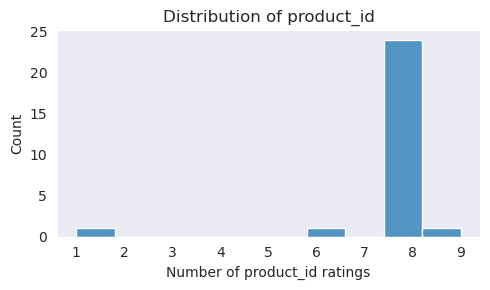

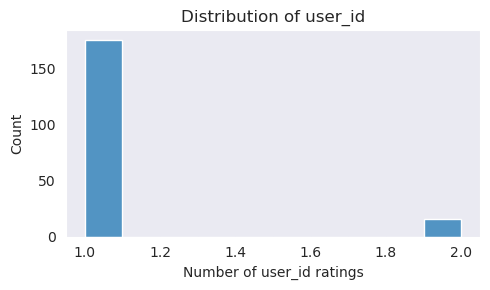

In [496]:
# Check the distribution of ratings to help decide the threshold to keep - What's the min no. of ratings for a product to be recommended to user? 8+ since this is the majority?

cols_of_interest = ['product_id', 'user_id']

for col in cols_of_interest:
    plt.figure(figsize=(5,3))
    df_vc = df_exp[col].value_counts(ascending=False).reset_index()
    
    sns.histplot(data=df_vc, x='count', bins=10)
    plt.xlabel(f'Number of {col} ratings')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


<div class="alert alert-block alert-warning">
Noise Reduction

Align with business on what threshold to set: 

- Minimum no. of ratings that a product should have
- Minimum no. of ratings that a user has provided

</div>

#### Input Block

Set threshold values for the minimum no. of ratings for products and by users

In [497]:
# Dummy Test: Set threshold values

# Set num of ratings threshold for products
n_threshold_prod = 5

# Set num of ratings threshold for users
n_threshold_user = 1

#### Sparse Matrix for Ratings

In [498]:
# Prepare Matrix using pivot_table - ( item as rows | user as columns )

df_pvt = df_exp.pivot_table(index='product_id', columns='user_id', values='rating')
df_pvt.fillna(0, inplace=True)
df_pvt.shape

(27, 191)

#### Noise Reduction

##### Filter ratings by product_id

In [499]:
# Aggregate ratings by product_id

gby_prod_ratings = df_exp.groupby('product_id')['rating'].agg('count')

In [500]:
# Get indices of product_id with ratings >= product threshold

idx_above_th_prod = gby_prod_ratings.loc[gby_prod_ratings >= n_threshold_prod].index
df_pvt_reduced = df_pvt.loc[idx_above_th_prod, :]
df_pvt_reduced.shape

(26, 191)

In [501]:
# Checkpoint: Pivot table columns should match result of above threhshold df columns

assert df_pvt.shape[1] == df_pvt_reduced.shape[1], "No of columns do not match. Check again"

##### Filter ratings by user_id

In [502]:
# Aggregate ratings by user_id

gby_user_ratings = df_exp.groupby('user_id')['rating'].agg('count')

In [503]:
# Get indices of user_id with ratings >= user threshold

idx_gby_th_user = gby_user_ratings.loc[gby_user_ratings >= n_threshold_user ].index
df_pvt_final = df_pvt_reduced.loc[:, idx_gby_th_user]
df_pvt_final.shape


(26, 191)

In [504]:
# Checkpoint: Pivot table rows should match result of above threshold df rows

assert df_pvt_reduced.shape[0] == df_pvt_final.shape[0], "No of rows do not match. Check again!"

In [505]:
df_pvt_final.shape

(26, 191)

In [521]:
df_pvt_final

user_id,AE2VXY4CFO36MDSIMPG43XHNF4GA,AE3D5CJ2GDUP5SQ3AAYMVAGDTX7A,AE3MQNNHHLUHXURL5S7IAR7JTGNQ,AE3O6366WGEQAANKJ76QETTUQQTQ,AE3Q6KSUK5P75D5HFYHCRAOLODSA,AE4BFRYLLJQRZJLJ755OH7DYIE4A,AE4DX3LKPJLQMTSMMVZISY3Z4LAA,AE4PHOB4VRRT6W2L4E5TT4QROAWA,AE5FZ5B3EEES45Q26PNUBTJ5DRYA,AE5JV64MRH475HD7BRHX43UG5U4A,...,AHURA5DMKF4YWCDDT44ACQDCBJAQ,AHV3ELGDSOWBYUQLXSPDCSHBQRHQ,AHV3TXIFCJPMS4D5JATCEUR266MQ,AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AHX47N6TUNADPXMMQKVASVBNIHJA,AHX4KZVASMGQQOST4T2RAQUZTLCA,AHXCDNSXAESERITAFELQABFVNLCA,AHYXOMUJUKZHBWHP43ZAB265EDGA,AHZE7X4JEEFGO55ORGHVUFLEKD3Q
product_id,,,,,,,,,,,,,,,,,,,,,
D001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
D003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D005,0.0,0.0,4.2,0.0,4.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.3,0.0,4.3,0.0,0.0,0.0,0.0,0.0,0.0
D009,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MODELING

In [506]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [507]:
# Generate csr matrix

csr_data = csr_matrix(df_pvt_final.values)

In [508]:
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 206 stored elements and shape (26, 191)>
  Coords	Values
  (0, 29)	4.2
  (0, 34)	4.2
  (0, 57)	4.2
  (0, 102)	4.2
  (0, 105)	4.2
  (0, 136)	4.2
  (0, 155)	4.2
  (0, 169)	4.2
  (1, 19)	4.0
  (1, 31)	4.0
  (1, 44)	4.0
  (1, 78)	4.0
  (1, 139)	4.0
  (1, 144)	4.0
  (1, 174)	4.0
  (1, 185)	4.0
  (2, 39)	3.9
  (2, 40)	3.9
  (2, 61)	3.9
  (2, 81)	3.9
  (2, 128)	3.9
  (2, 154)	3.9
  (2, 167)	3.9
  (2, 179)	3.9
  (3, 41)	4.2
  :	:
  (22, 190)	4.0
  (23, 20)	4.1
  (23, 21)	4.1
  (23, 65)	4.1
  (23, 100)	4.1
  (23, 116)	4.1
  (23, 118)	4.1
  (23, 166)	4.1
  (23, 175)	4.1
  (24, 23)	3.6
  (24, 27)	3.6
  (24, 36)	3.6
  (24, 49)	3.6
  (24, 119)	3.6
  (24, 132)	3.6
  (24, 162)	3.6
  (24, 165)	3.6
  (25, 13)	4.3
  (25, 66)	4.3
  (25, 82)	4.3
  (25, 87)	4.3
  (25, 109)	4.3
  (25, 115)	4.3
  (25, 125)	4.3
  (25, 188)	4.3


<div class="alert alert-block alert-warning">
TO-DO: Hyperparameter Search
</div>

In [509]:
# Build Model 

knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs= -1)
knn.fit(csr_data)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

#### Input Block

In [511]:
# query = 'Wayona USB'
print(query)


boAt


In [512]:
n_result = 10
print(n_result)

10


#### Implem Test

In [513]:
# reset_index for df_pvt_final before passing to get_product_recommendation

df_pvt_final_ri = df_pvt_final.reset_index()

In [518]:
def get_product_recommendation(data_df, data_pvt, data_csr, query, n_result):
    
    l_data = get_product_data(query, data_df, 'product_name')

    if len(l_data):
        # get first index in l_data
        prod_id = l_data.iloc[0]['product_id']
        
        prod_idx = data_pvt[data_pvt['product_id'] == prod_id].index[0]

        distance, indices = knn.kneighbors(data_csr[prod_idx], n_neighbors=n_result+1) 

        # rec_prod_indices = sorted( list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[:0, -1]
        rec_prod_indices = sorted( list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[: 0:-1]
       
       # Using the idx from prod_indices locate the product_id index in final pvt table
        recommended_products =  []

        for ind_dis in rec_prod_indices:

            pvt_prod_id = data_pvt.iloc[ind_dis[0]]['product_id'] 

            # use it to locate index in the original dataset df
            data_prod_idx = data_df[df['product_id'] == pvt_prod_id].index

            recommended_products.append({ 'ID' : data_df.iloc[data_prod_idx]['product_id'].values[0],
                                        'Name': data_df.iloc[data_prod_idx]['product_name'].values[0], 
                                        'Distance': ind_dis[1]})
            
        df_recommended_products = pd.DataFrame(recommended_products, index=(range(1, n_result+1)))
        return df_recommended_products
    
    else:

        return "NO RECOMMENDATIONS FOUND!"

In [519]:

df_recommendations = get_product_recommendation(df, df_pvt_final_ri, csr_data, query, n_result )
# # print((distance, indices))
# print(distance)
# print(distance.squeeze().tolist())
# print(indices)
# print(indices.squeeze().tolist())
# print(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())))
# print( sorted( list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])[: 0:-1] )


Found products with similar keywords.


In [520]:
df_recommendations

,ID,Name,Distance
1,D013,AmazonBasics Flexible Premium HDMI Cable,1.0
2,H012,Prestige Delight PRWO Electric Rice Cooker (1 ...,1.0
3,H013,Bajaj Majesty RX10,1.0
4,H008,Philips HD9306/06 1.5-Litre Electric Kettle,1.0
5,H003,KNOWZA Electric Handheld Milk Wand Mixer Frother,1.0
6,H006,USHA 1212 PTC with Adjustable Thermostat Fan H...,1.0
7,H005,akiara - Makes life easy Mini Sewing Machine,1.0
8,H009,Libra Room Heater,1.0
9,H007,4 in 1 Handheld Electric Vegetable Cutter Set,1.0
10,D004,boAt Deuce USB 300 2 in 1 Type-C & Micro USB,0.0


In [425]:
# Using the idx from prod_indices locate the product_id index in final pvt table

recommended_products =  []

for ind_dis in prod_indices:

    pvt_prod_id = df_pvt_final_ri.iloc[ind_dis[0]]['product_id'] 

    # use it to locate index in the original dataset df

    data_prod_idx = df[df['product_id'] == pvt_prod_id].index

    recommended_products.append({ 'ID' : df.iloc[data_prod_idx]['product_id'].values[0],
                                  'Name': df.iloc[data_prod_idx]['product_name'].values[0], 
                                  'Distance': ind_dis[1]})
    
recommended_products

[{'ID': 'D013',
  'Name': 'AmazonBasics Flexible Premium HDMI Cable',
  'Distance': 1.0},
 {'ID': 'H012',
  'Name': 'Prestige Delight PRWO Electric Rice Cooker (1 L, White)',
  'Distance': 1.0},
 {'ID': 'H013', 'Name': 'Bajaj Majesty RX10 ', 'Distance': 1.0},
 {'ID': 'H008',
  'Name': 'Philips HD9306/06 1.5-Litre Electric Kettle',
  'Distance': 1.0},
 {'ID': 'H003',
  'Name': 'KNOWZA Electric Handheld Milk Wand Mixer Frother',
  'Distance': 1.0},
 {'ID': 'H006',
  'Name': 'USHA 1212 PTC with Adjustable Thermostat Fan Heater (Black/Brown, 1500-Watts).',
  'Distance': 1.0},
 {'ID': 'H005',
  'Name': 'akiara - Makes life easy Mini Sewing Machine',
  'Distance': 1.0},
 {'ID': 'H009', 'Name': 'Libra Room Heater', 'Distance': 1.0},
 {'ID': 'H007',
  'Name': '4 in 1 Handheld Electric Vegetable Cutter Set',
  'Distance': 1.0},
 {'ID': 'D004',
  'Name': 'boAt Deuce USB 300 2 in 1 Type-C & Micro USB',
  'Distance': 0.0}]